In [1]:
# Overview about competition:
# This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

# data set of MNIST ("Modified National Institute of Standards and Technology")
# the goal is to correctly identify digits from a dataset of handwritten images

# Practice skill:
# 1. Computer vision fundamentals including simple neural networks
# 2. Classification methods such as SVM and K-nearest neighbors


In [2]:
# data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

# Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
# Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
# This pixel-value is an integer between 0 and 255, inclusive.

# The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. 
# The rest of the columns contain the pixel-values of the associated image.

# The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

# submission file should be in the following format:
#  ImageId,Label
#  1,3
#  2,7
#  3,8 
#  (27997 more lines)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('../DataSets/digit recognizer/train.csv')
df_test = pd.read_csv('../DataSets/digit recognizer/test.csv')

In [5]:
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [6]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [8]:
img_array = np.array(df_train.iloc[3, 1:]).reshape(28, 28)

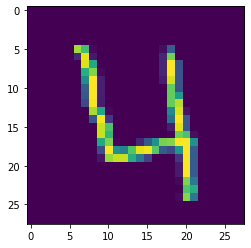

In [9]:
plt.imshow(img_array)

In [10]:
def print_img(index):
  img_array = np.array(df_train.iloc[index, 1:]).reshape(28, 28)
  return plt.imshow(img_array)

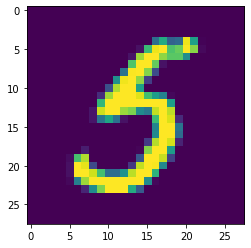

In [11]:
print_img(345)

In [12]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, :1]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 98)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 784), (4200, 784), (37800, 1), (4200, 1))

In [15]:
# Normalization

X_train = X_train/255
X_test = X_test/255

# SVM algirithm

In [ ]:
# from sklearn.svm import SVC
# model = SVC()
# model.fit(X_train, y_train)

In [ ]:
# model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
# from df_test file

# df_test.head()

In [ ]:
# Normalizing of df_test data

# df_test = df_test/255

In [ ]:
# y_pred = model.predict(df_test)

In [ ]:
# df_test['Label'] = y_pred

In [ ]:
# df_test['ImageId'] = np.arange(1, (len(df_test)+1))

In [ ]:
# df_test.head()

In [ ]:
# df_test[['ImageId','Label']].to_csv('digits_recognizer_SVM_poly.csv', index=False)

# ANN

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [18]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
Total params: 41,700
Trainable params: 41,700
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 20, batch_size = 64)

Epoch 1/20
591/591 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8863 - val_loss: 0.2673 - val_accuracy: 0.9164
Epoch 2/20
591/591 [==============================] - 1s 2ms/step - loss: 0.1959 - accuracy: 0.9429 - val_loss: 0.2352 - val_accuracy: 0.9281
Epoch 3/20
591/591 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9565 - val_loss: 0.1739 - val_accuracy: 0.9445
Epoch 4/20
591/591 [==============================] - 1s 2ms/step - loss: 0.1210 - accuracy: 0.9649 - val_loss: 0.1572 - val_accuracy: 0.9502
Epoch 5/20
591/591 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9706 - val_loss: 0.1402 - val_accuracy: 0.9550
Epoch 6/20
591/591 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9732 - val_loss: 0.1466 - val_accuracy: 0.9545
Epoch 7/20
591/591 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.1294 - val_accuracy: 0.9605
Epoch 

In [24]:
# Score on unkown (train) data

In [25]:
model.evaluate(X_test, y_test)

132/132 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9652


[0.16543054580688477, 0.965238094329834]

In [26]:
X_test.shape

(4200, 784)

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred[4000].argmax()

9

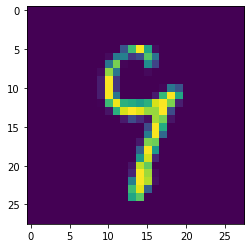

In [29]:
plt.imshow(np.array(X_test.iloc[4000]*255).reshape(28, 28))

In [30]:
y_pred.argmax(axis=1).shape

(4200,)

In [31]:
df_test.shape

(28000, 784)

In [32]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = df_test/255

In [34]:
y_pred = model.predict(X)

In [35]:
y_final = y_pred.argmax(axis=1)

In [36]:
y_pred[27999].argmax()

2

In [37]:
df_test['Label'] = y_final

In [38]:
df_test['ImageId'] = np.arange(1, (len(df_test)+1))

In [39]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Label,ImageId
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


In [40]:
df_test[['ImageId', 'Label']].to_csv('digits_recognizer_ANN.csv', index=False)

# Prediction on own images

In [41]:
# install OpenCV for computer vision related task

# 1 read .jpg image => numpy array 

In [42]:
import cv2

In [43]:
A = cv2.imread('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/0.jpg')

In [44]:
type(A)

numpy.ndarray

In [45]:
A.shape

(48, 60, 3)

In [46]:
# 2. this image is colored image, so need to convert into grayscale image

In [47]:
A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

In [48]:
A.shape

(48, 60)

In [49]:
#. 3 Resize to 28*28

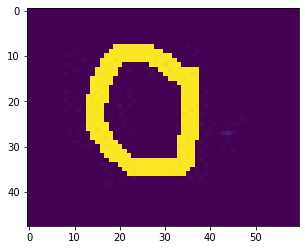

In [50]:
plt.imshow(A)

In [51]:
A = cv2.resize(A, (28,28))

In [52]:
A.shape

(28, 28)

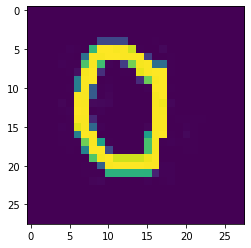

In [53]:
plt.imshow(A)        # image will be blur

In [54]:
# 4. scale down image by 255
A = A/255

In [55]:
# 5. reshape to
A = A.reshape(1, 784)

In [56]:
model.predict(A)

array([[7.2715536e-02, 1.6621284e-08, 7.3897332e-01, 1.3299260e-04,
        2.0680416e-06, 1.5283097e-06, 4.8496058e-05, 1.3492182e-01,
        1.0588937e-04, 5.3098284e-02]], dtype=float32)

In [57]:
model.predict(A).argmax()

2

In [58]:
def pred_number(img_path):
    A = cv2.imread(img_path)
    A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
    A = cv2.resize(A, (28,28))
    A = A/255
    A = A.reshape(1, 784)
    return model.predict(A).argmax()

In [59]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/0.jpg')

2

In [60]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/1.jpg')

5

In [61]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/2.jpg')

2

In [62]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/3.jpg')

3

In [63]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/4.jpg')

4

In [64]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/5.jpg')

5

In [65]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/6.jpg')

6

In [66]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/7.jpg')

7

In [67]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/8.jpg')

6

In [68]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/9.jpg')

6

In [69]:
pred_number('E:/Data Science/Nikam Sir_Data Science/Data Sets/digit recognizer/0.jpg')

2